Importing the necessary modules

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.stattools import adfuller, acf, pacf
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/85/7d/58635941dfbb5b4e197adb88080b9cbfb230dc3b75683698a530a1989bdb/Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 667.8 kB/s eta 0:00:01
   -------------------------------- ------- 501.8/614.7 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --------------- ------------------------ 1.1/2.8 MB 22.7 MB/s eta 0:00:01
   --------------------------

In [2]:
df = pd.read_csv("Walmart DataSet.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Data Exploration 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [6]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6435 entries, 0 to 6434
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
6435 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 50.4 KB


In [7]:
#Checking missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [10]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 20:18:27.692307712,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-01-10 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-12 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-03-02 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-12-10 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


C:\Users\rashm\AppData\Local\Temp\ipykernel_21344\694563542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weekly_Sales'])


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

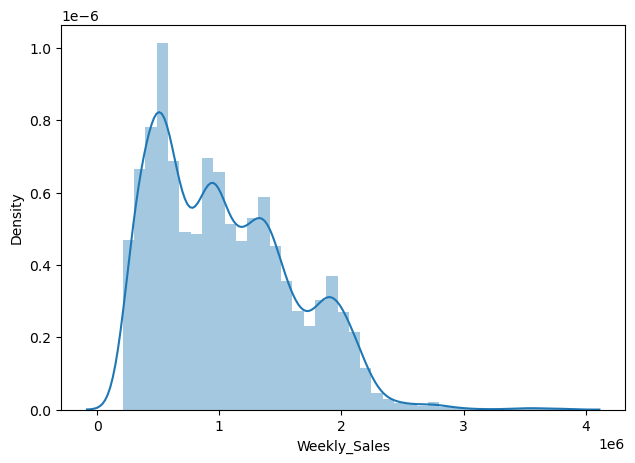

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Weekly_Sales'])

<Axes: >

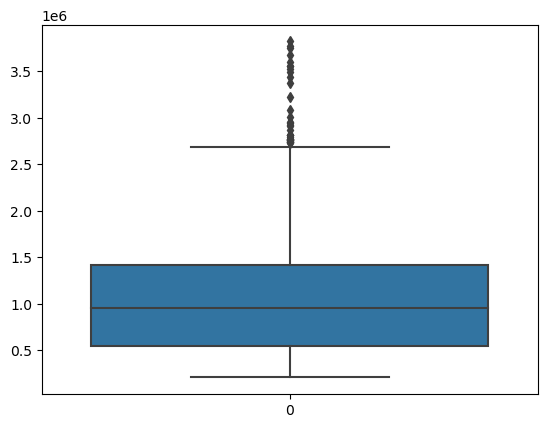

In [12]:
sns.boxplot(df["Weekly_Sales"])

There are some outliers that needs to be handeled. Using IQR for this

In [13]:
Q1 = df.Weekly_Sales.quantile(0.25)
Q3 = df.Weekly_Sales.quantile(0.75)
Q1, Q3

(553350.105, 1420158.66)

In [14]:
IQR = Q3 - Q1
IQR

866808.5549999999

In [15]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-746862.7275, 2720371.4924999997)

In [16]:
New_df = df[(df.Weekly_Sales<upper_limit)]
New_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


C:\Users\rashm\AppData\Local\Temp\ipykernel_21344\359187207.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weekly_Sales'])
C:\Users\rashm\AppData\Local\Temp\ipykernel_21344\359187207.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(New_df['Weekly_Sales'])


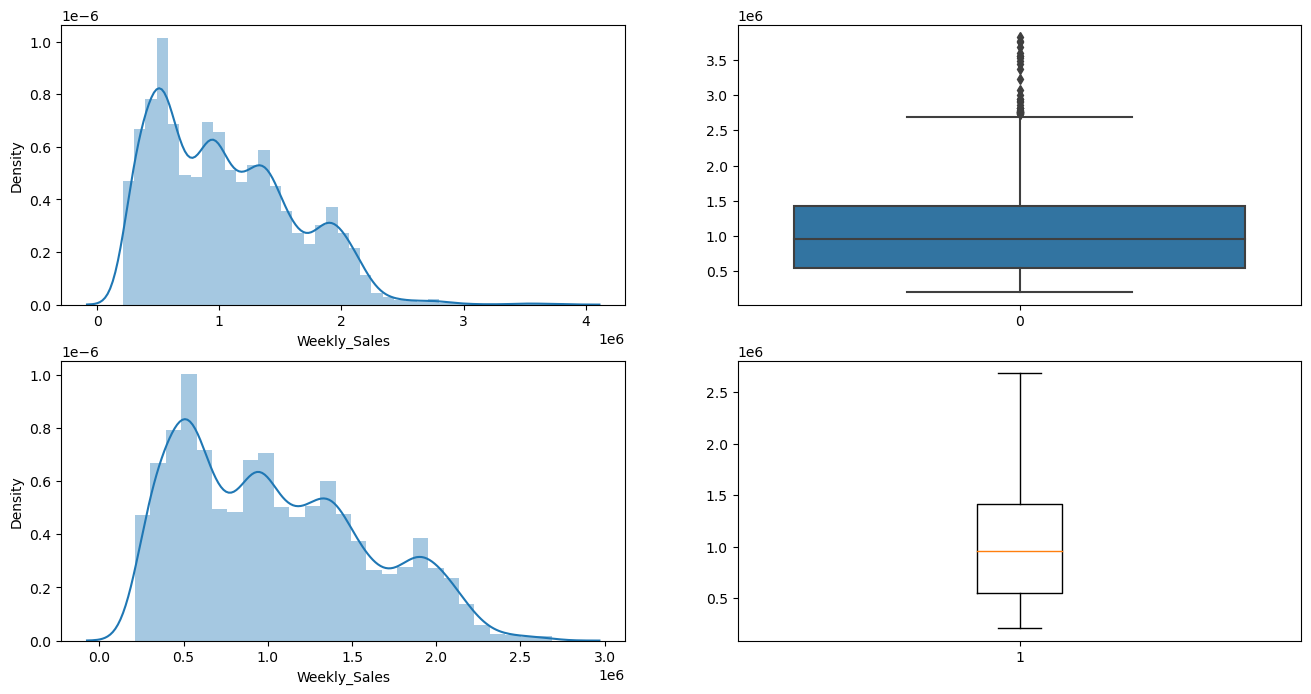

In [17]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Weekly_Sales'])
plt.subplot(2,2,2)
sns.boxplot(df['Weekly_Sales'])
plt.subplot(2,2,3)
sns.distplot(New_df['Weekly_Sales'])
plt.subplot(2,2,4)
plt.boxplot(New_df['Weekly_Sales'])
plt.show()

Checking the impactful parameters which are, temperature, fuel price, holidays and CPI on weekly sales

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

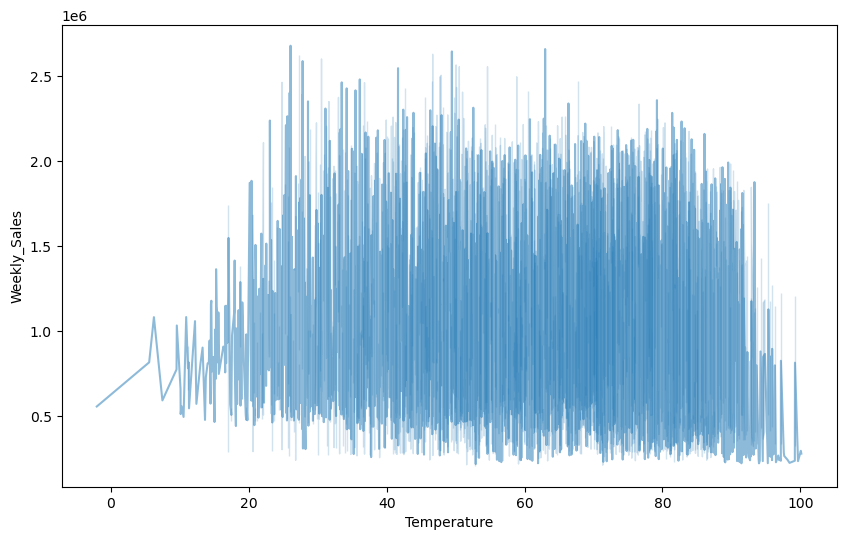

In [18]:
plt.figure(figsize=(10, 6)) 
temp = New_df['Temperature']
sales = New_df['Weekly_Sales']
sns.lineplot(x=temp, y=sales, data=New_df, alpha=0.5)

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

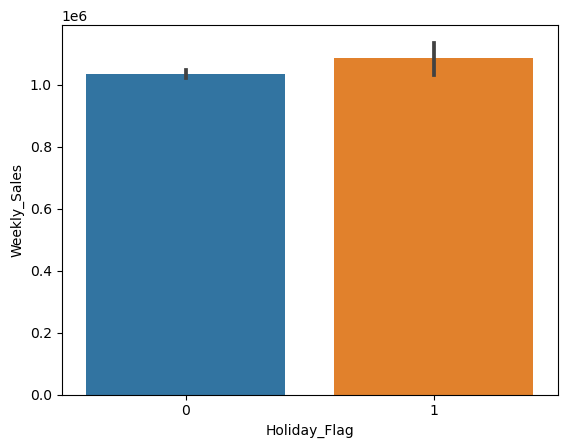

In [19]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=New_df)

In [20]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [21]:
New_df.loc[df['Weekly_Sales']<=0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

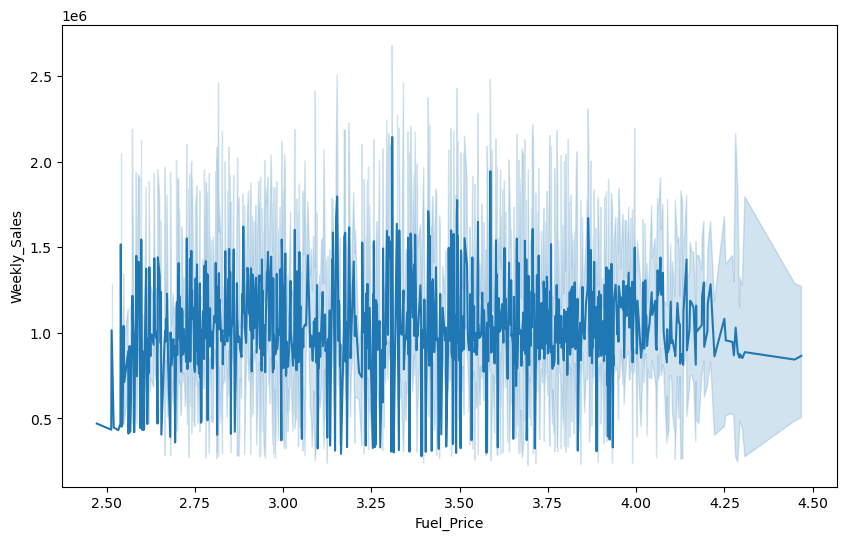

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Fuel_Price', y='Weekly_Sales', data=New_df)

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

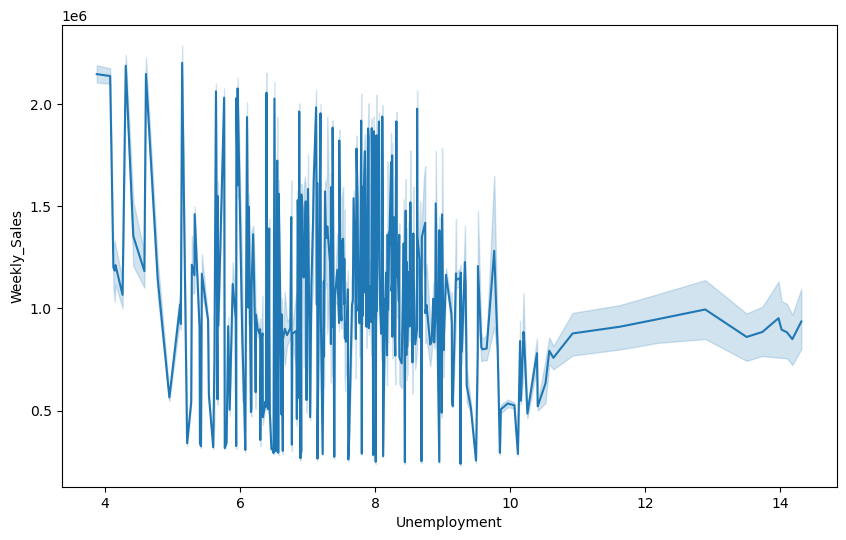

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Unemployment', y='Weekly_Sales', data=New_df)

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

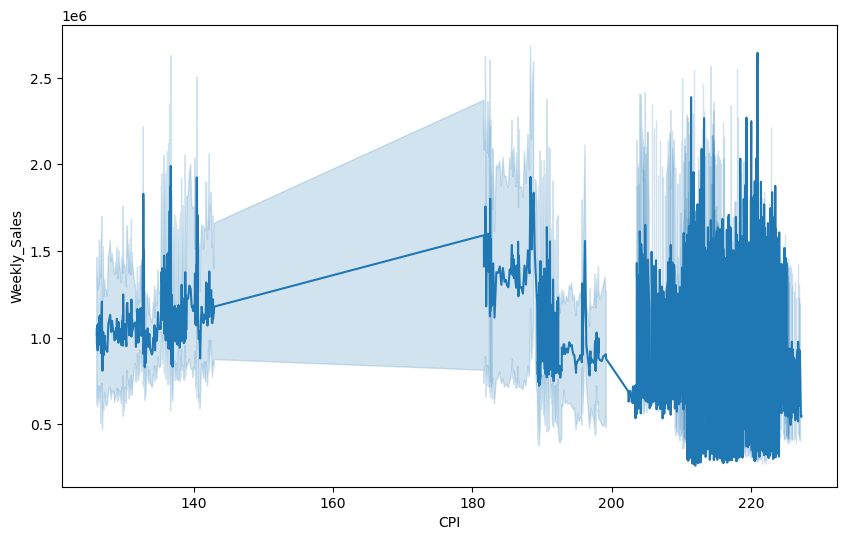

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(x='CPI', y='Weekly_Sales', data=New_df)

There is no significant effect on weekly sales 

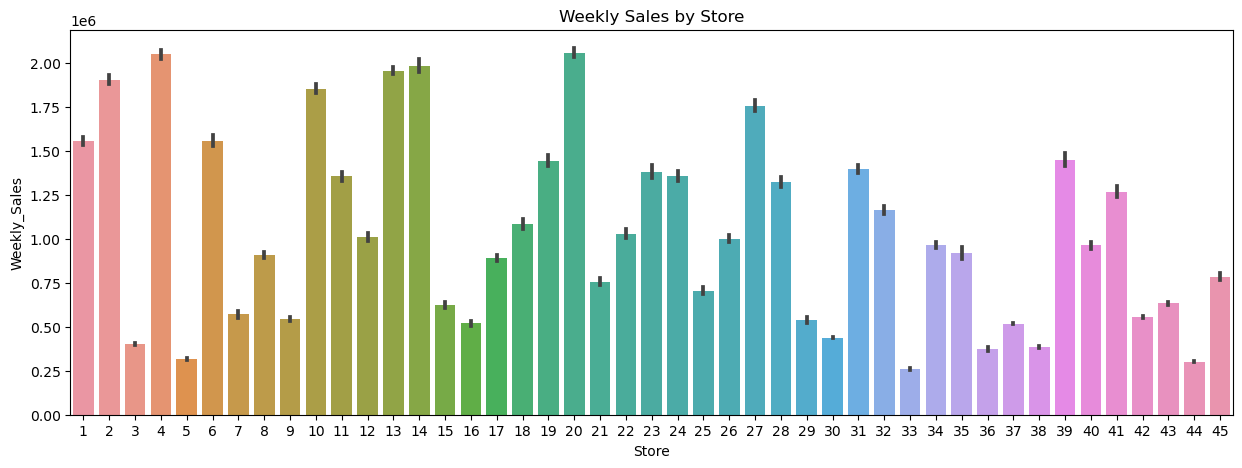

In [22]:
x = New_df['Store']
y = New_df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
sns.barplot(x=x, y=y, data = New_df)
plt.show()

The above graph shows store wise weekly sales

In [26]:
df['Store'] = pd.Categorical(df['Store'])

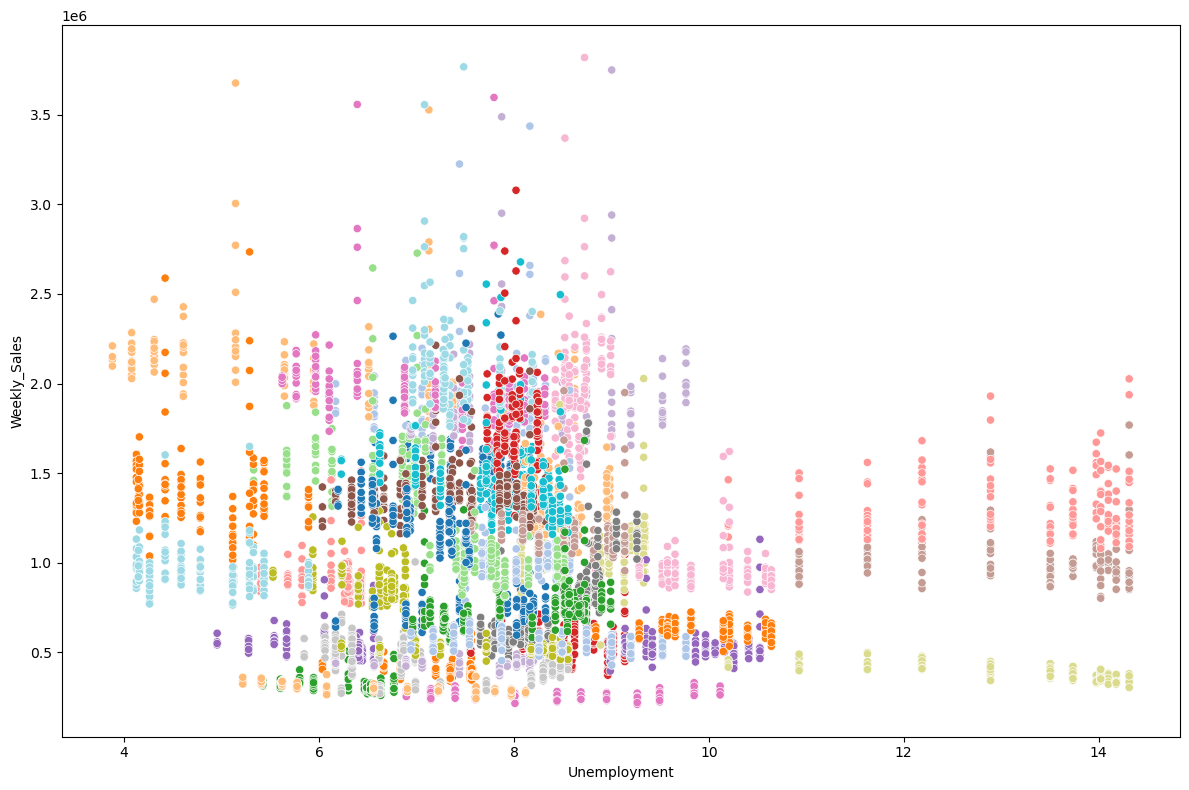

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', hue='Store', palette='tab20', legend=False)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

Scatter plot to show the store wise effect of unemployment on weekly sales 

## Changing date to datetime for deeper analysis

In [28]:
New_df['week'] =New_df['Date'].dt.isocalendar().week
New_df['month'] =New_df['Date'].dt.month 
New_df['year'] =New_df['Date'].dt.year

C:\Users\rashm\AppData\Local\Temp\ipykernel_21344\284726128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['week'] =New_df['Date'].dt.isocalendar().week
C:\Users\rashm\AppData\Local\Temp\ipykernel_21344\284726128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['month'] =New_df['Date'].dt.month
C:\Users\rashm\AppData\Local\Temp\ipykernel_21344\284726128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [29]:
New_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,17,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,48,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,18,5,2010


In [30]:
New_df.groupby('month')['Weekly_Sales'].mean()

month
1     9.476139e+05
2     1.054597e+06
3     1.024975e+06
4     1.024324e+06
5     1.035379e+06
6     1.064848e+06
7     1.014212e+06
8     1.044874e+06
9     1.009457e+06
10    1.027683e+06
11    1.093977e+06
12    1.110051e+06
Name: Weekly_Sales, dtype: float64

In [31]:
New_df.groupby('year')['Weekly_Sales'].mean()

year
2010    1.040919e+06
2011    1.033780e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='month'>

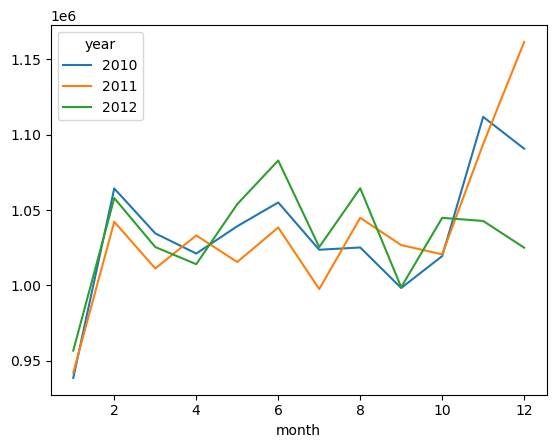

In [32]:
monthly_sales = pd.pivot_table(New_df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

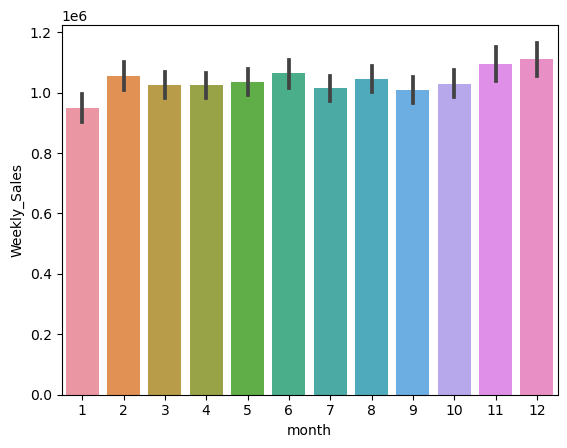

In [33]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=New_df)

The above graphs shows yearly and monthly sales 

## Checking the corelation between all the columns

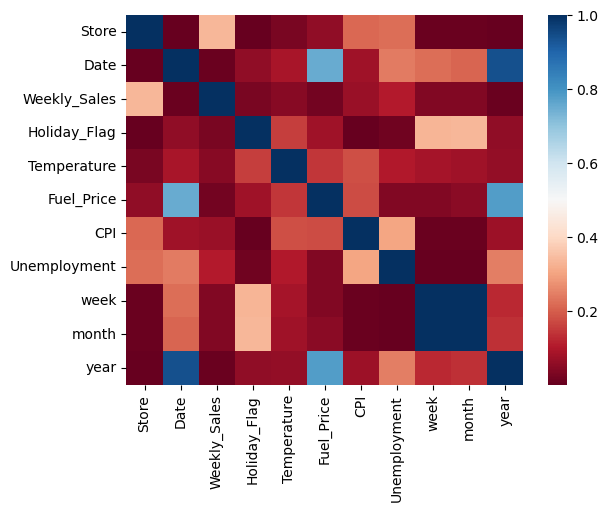

In [34]:
sns.heatmap(New_df.corr().abs(), cmap='RdBu')    # To see the correlations
plt.show()

Temperature, unemployment, CPI have no significant effect on weekly sales, so I will drop them.

In [35]:
New_df1 = New_df.copy()

In [36]:
drop_cols = ['Temperature', 'CPI', 'Unemployment']
New_df1.drop(drop_cols, axis=1, inplace=True)

In [37]:
New_df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,week,month,year
0,1,2010-05-02,1643690.90,0,2.572,17,5,2010
1,1,2010-12-02,1641957.44,1,2.548,48,12,2010
2,1,2010-02-19,1611968.17,0,2.514,7,2,2010
3,1,2010-02-26,1409727.59,0,2.561,8,2,2010
4,1,2010-05-03,1554806.68,0,2.625,18,5,2010


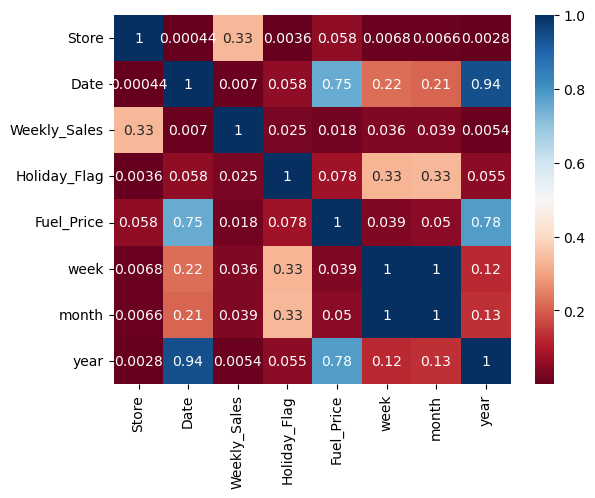

In [38]:
sns.heatmap(New_df1.corr().abs(), cmap='RdBu', annot=True)    # To see the correlations
plt.show()

## Time series Models

In [39]:
New_df.set_index('Date', inplace=True)

In [40]:
New_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
Date,,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,17,5,2010
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,48,12,2010
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,18,5,2010


## Ploting the sales

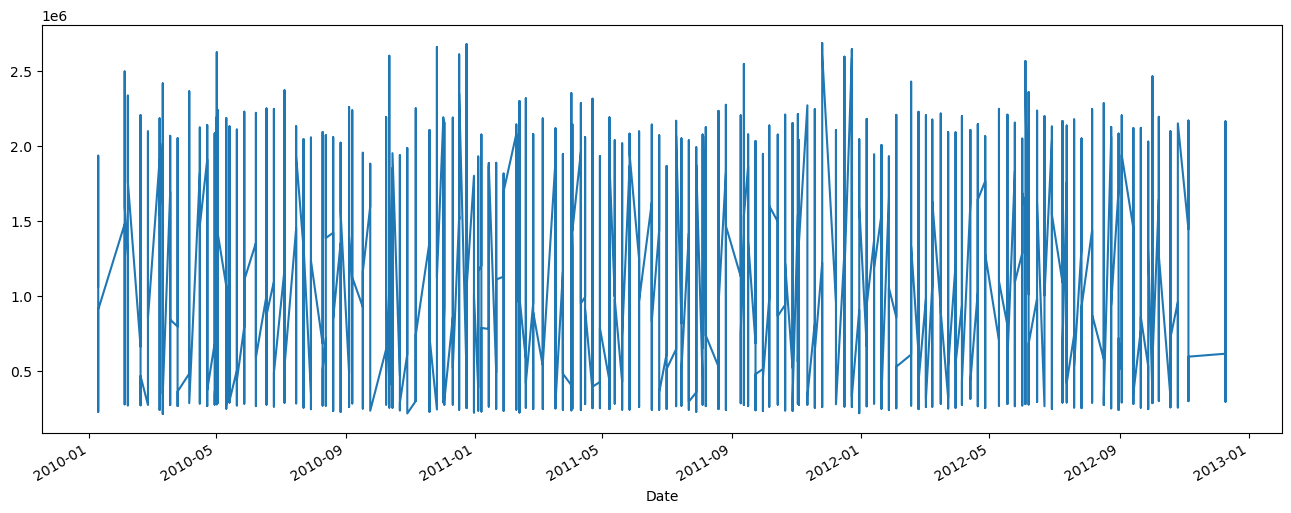

In [41]:
plt.figure(figsize=(16,6))
New_df['Weekly_Sales'].plot()
plt.show()

In [42]:
df_month =New_df.Weekly_Sales.resample('M').mean()
df_month

Date
2010-01-31    9.386639e+05
2010-02-28    1.064372e+06
2010-03-31    1.034590e+06
2010-04-30    1.021177e+06
2010-05-31    1.039303e+06
2010-06-30    1.055082e+06
2010-07-31    1.023702e+06
2010-08-31    1.025212e+06
2010-09-30    9.983559e+05
2010-10-31    1.019500e+06
2010-11-30    1.111877e+06
2010-12-31    1.090754e+06
2011-01-31    9.420697e+05
2011-02-28    1.042273e+06
2011-03-31    1.011263e+06
2011-04-30    1.033220e+06
2011-05-31    1.015565e+06
2011-06-30    1.038471e+06
2011-07-31    9.976049e+05
2011-08-31    1.044895e+06
2011-09-30    1.026810e+06
2011-10-31    1.020663e+06
2011-11-30    1.093869e+06
2011-12-31    1.161603e+06
2012-01-31    9.567817e+05
2012-02-29    1.057997e+06
2012-03-31    1.025510e+06
2012-04-30    1.014127e+06
2012-05-31    1.053948e+06
2012-06-30    1.082920e+06
2012-07-31    1.025480e+06
2012-08-31    1.064514e+06
2012-09-30    9.988663e+05
2012-10-31    1.044885e+06
2012-11-30    1.042797e+06
2012-12-31    1.025078e+06
Freq: M, Name: Weekly_S

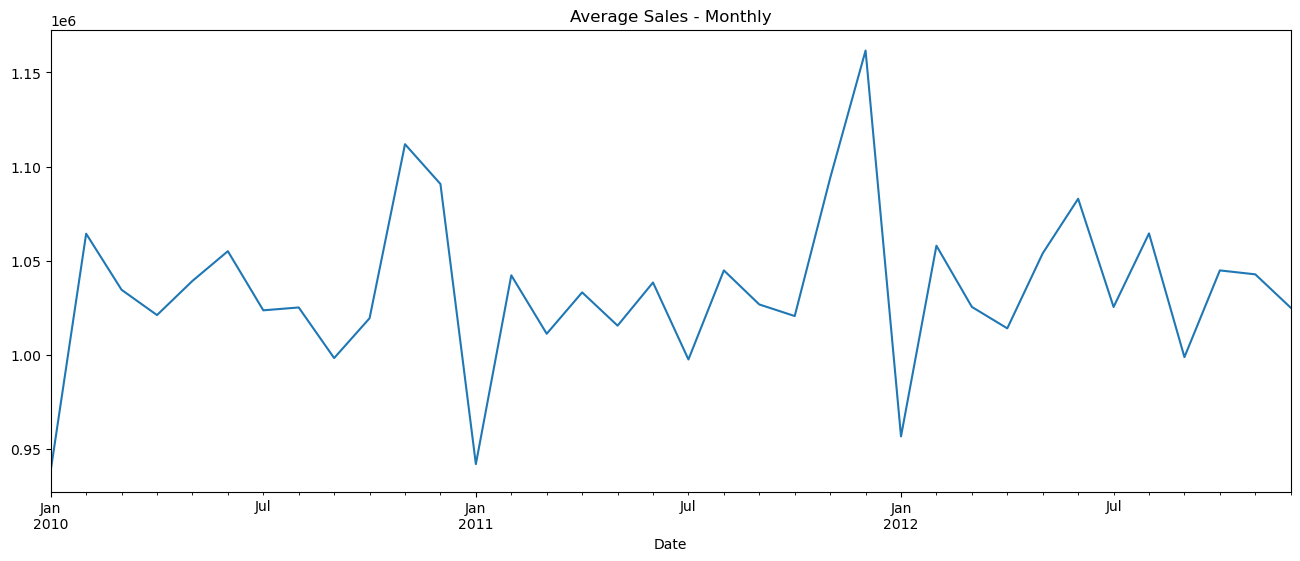

In [43]:
plt.figure(figsize=(16,6))
df_month.plot()
plt.title('Average Sales - Monthly')
plt.show()

In [58]:
df_week =New_df.resample('W').mean()
df_week

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
Date,,,,,,,,,,
2010-01-10,23.0,9.386639e+05,0.0,69.868000,2.734333,168.354706,8.475289,1.0,1.0,2010.0
2010-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
2010-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
2010-02-07,23.0,1.103792e+06,0.0,65.127111,2.810422,167.885568,8.463144,5.0,2.0,2010.0
...,...,...,...,...,...,...,...,...,...,...
2012-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
2012-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
2012-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN


<Axes: xlabel='Date'>

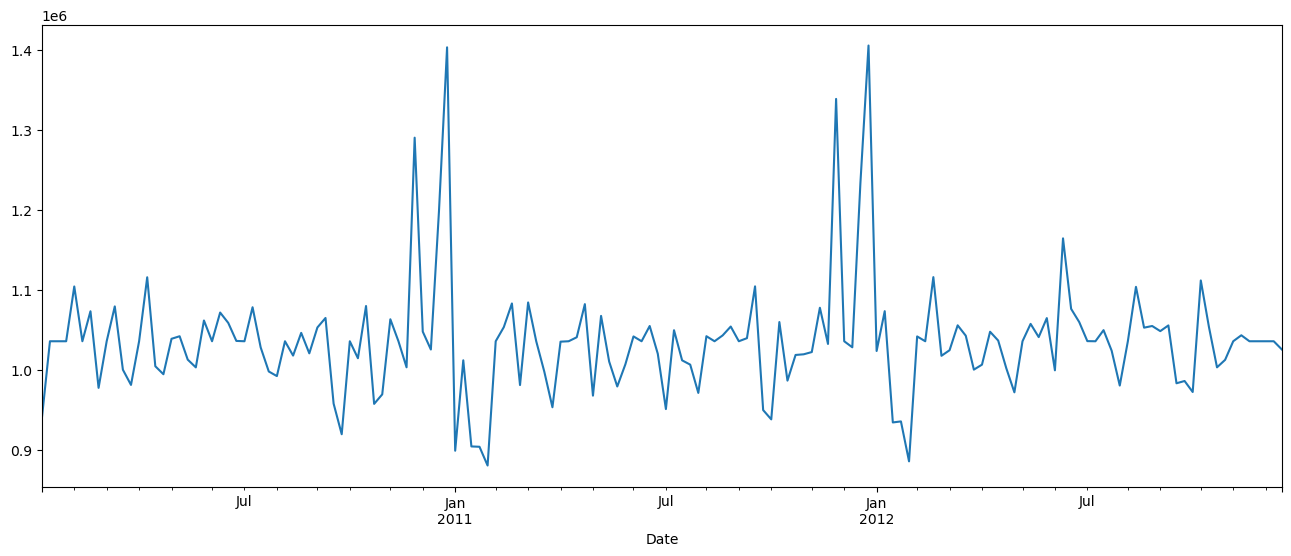

In [60]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].fillna(int(df_week['Weekly_Sales'].mean()), inplace=True)
df_week['Weekly_Sales'].plot()

With the collecting data as weekly, average sales are clear.

## Calculating average mean

The data is not stationary, hence checking with rolling mean 

In [61]:
roling_mean = df_week['Weekly_Sales'].rolling(window=2, center = False).mean()
roling_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

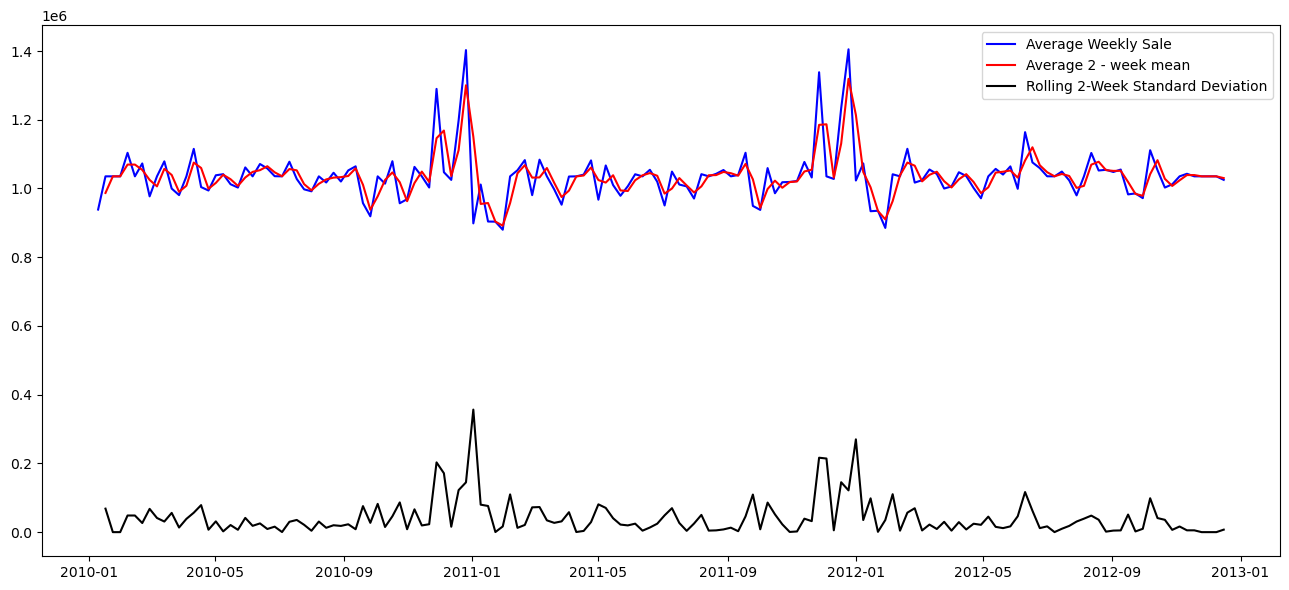

In [62]:
fig, ax = plt.subplots(figsize=(13,6))
ax.plot(df_week['Weekly_Sales'], color='blue', label= 'Average Weekly Sale')
ax.plot(roling_mean, color='red', label = 'Average 2 - week mean')
ax.plot(roling_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

Cross-checking with adfuller

In [63]:
adfuller(df_week['Weekly_Sales'])

(-6.496100848192012,
 1.1932630872227351e-08,
 4,
 149,
 {'1%': -3.4750180242954167,
  '5%': -2.8811408028842043,
  '10%': -2.577221358046935},
 3507.437483304945)

The data is not stationary, further checking with more stationary data

## Train test split

In [64]:
train_data = df_week[:int(0.7*(len(df_week)))]
test_data = df_week[int(0.7*(len(df_week))):]
print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (107, 10)
Test: (47, 10)


In [65]:
target = 'Weekly_Sales'
used_cols = [c for c in df_week.columns.to_list() if c not in [target]]

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

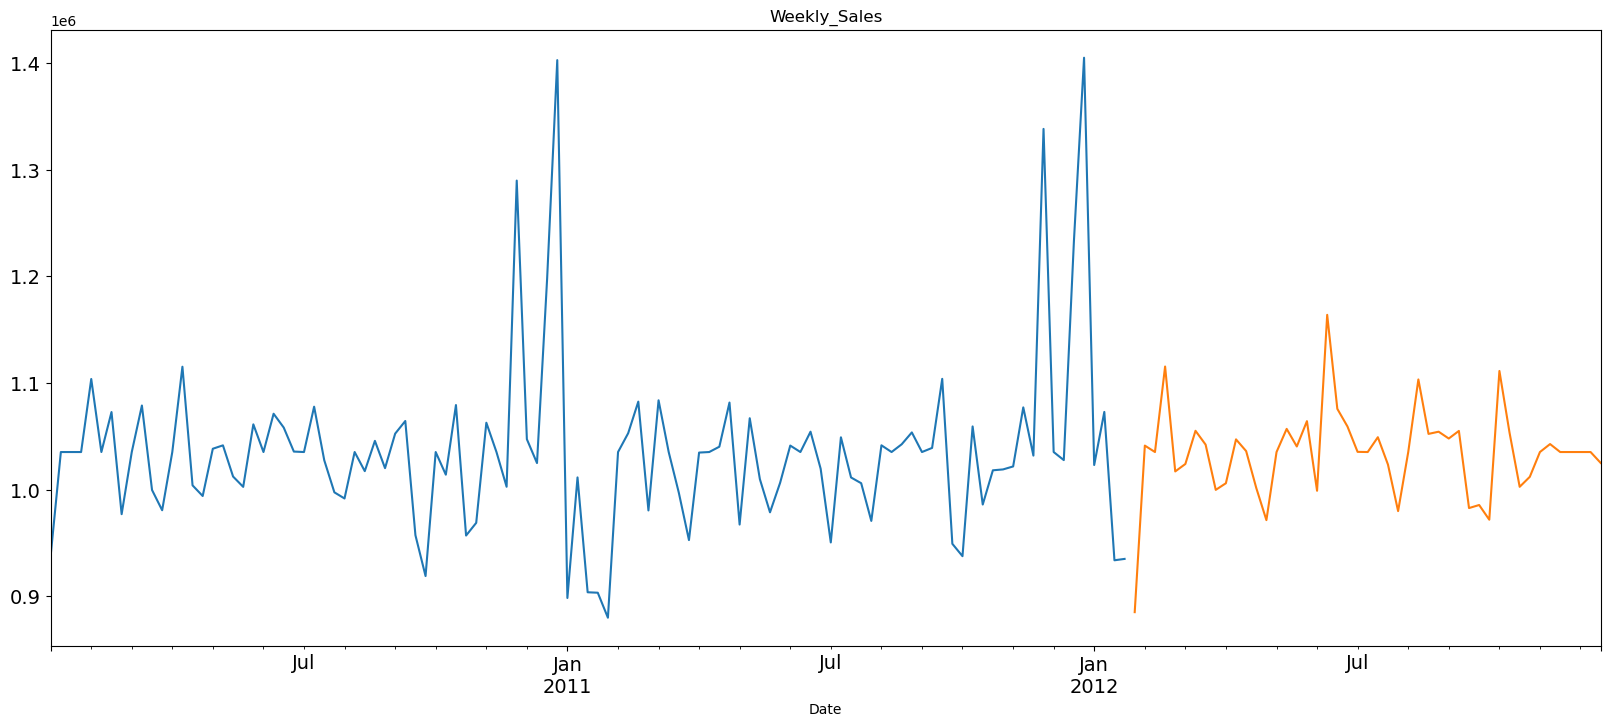

In [66]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

## Decomposing Weekly Data to Observe Seasonality

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose as season

In [70]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data 

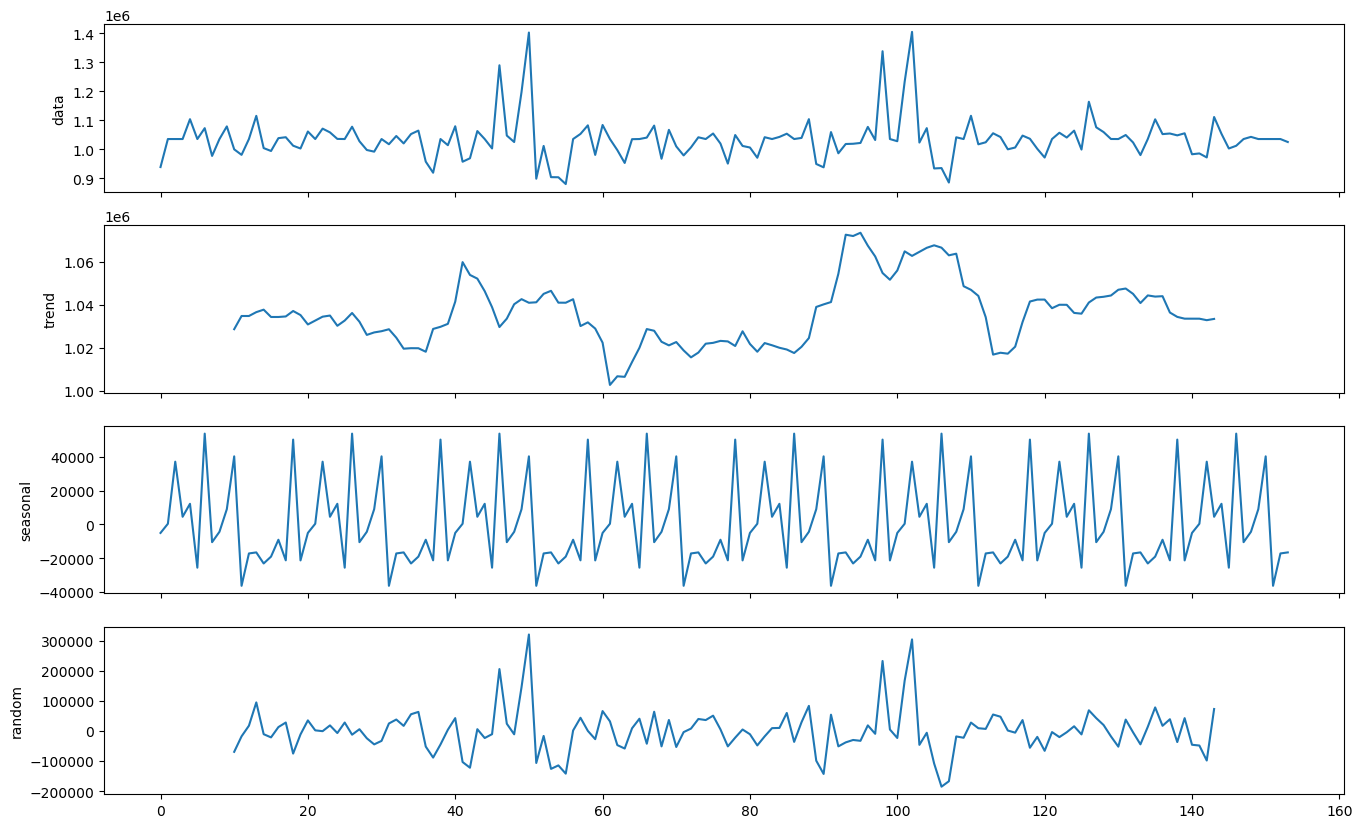

In [71]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

From the graphs above, every 20 step seasonality converges to beginning point. This helps me to tune my model.

## Trying To Make Data More Stationary

1.Difference

In [73]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values

In [74]:
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

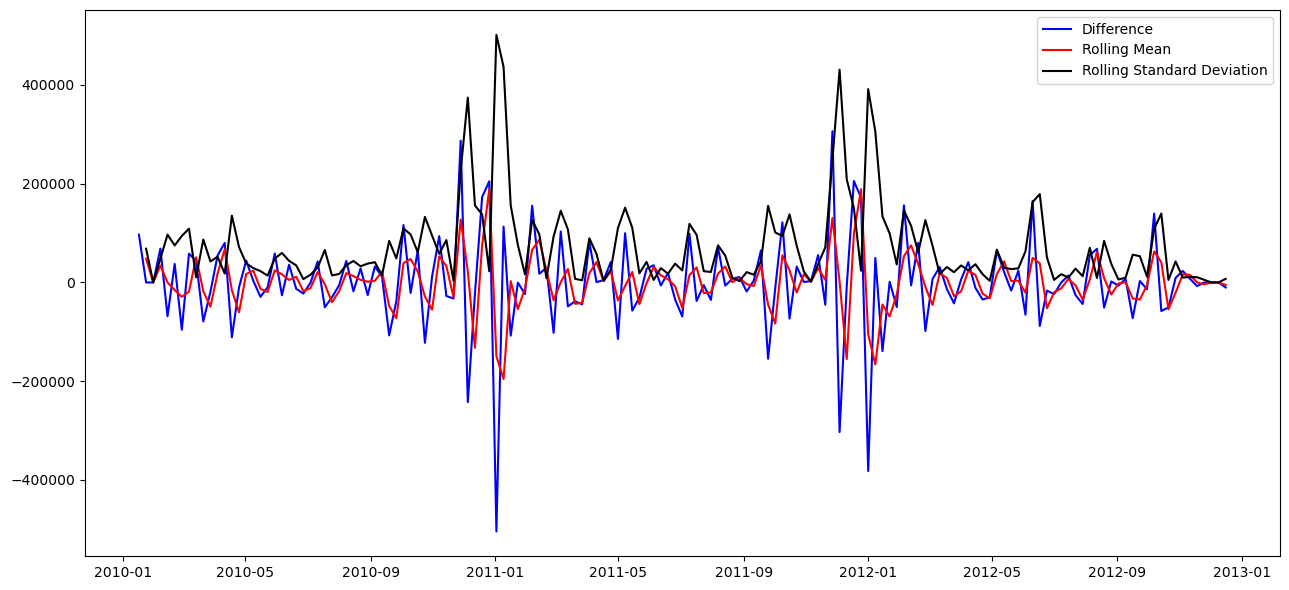

In [75]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

2.Shift

In [78]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

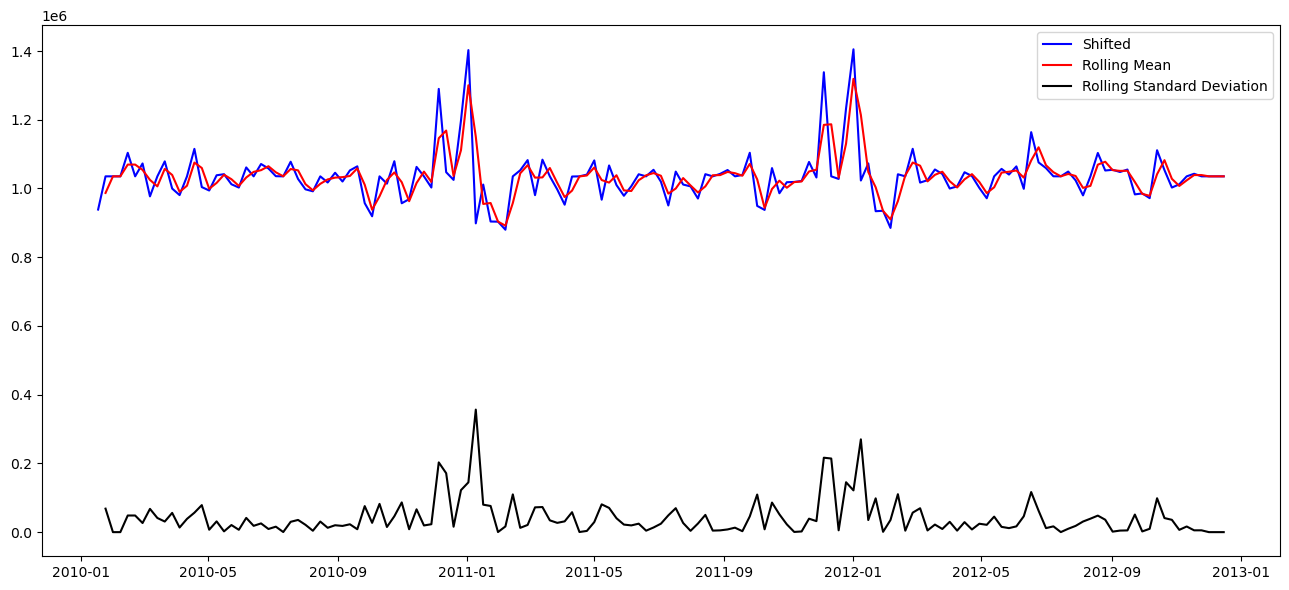

In [84]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Shifted')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

3. Log

In [81]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data

In [82]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

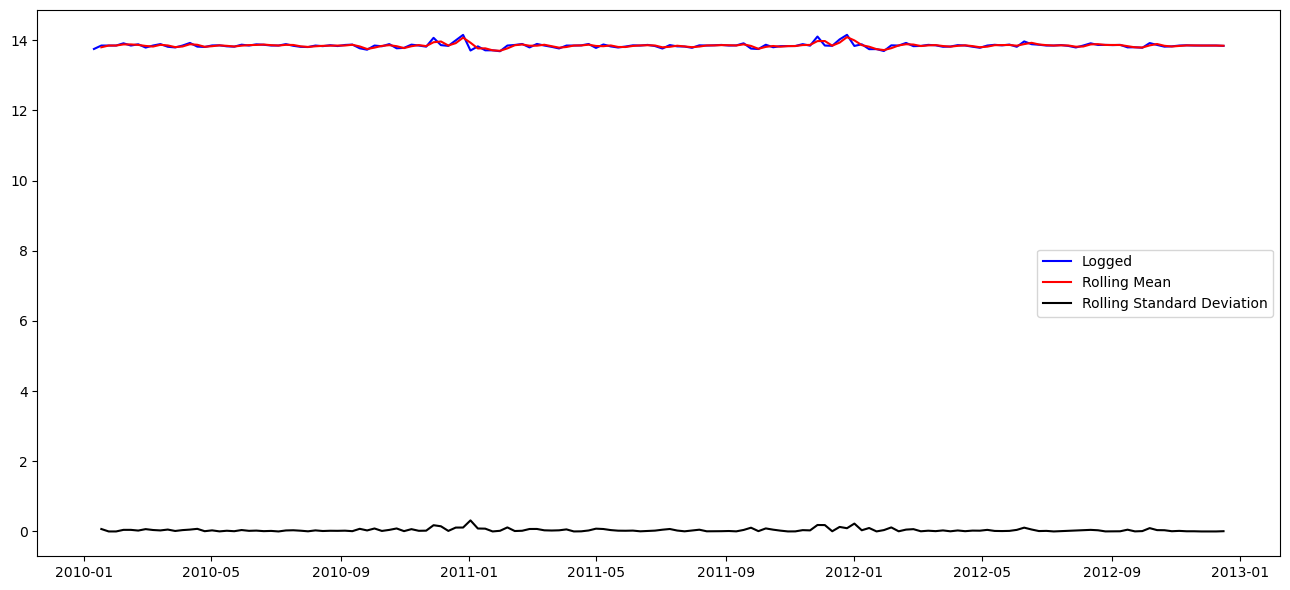

In [83]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

Auto-ARIMA MODEL

In [85]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [87]:
from pmdarima import auto_arima

In [88]:
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=2786.150, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=2749.708, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=2753.407, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=2754.211, Time=0.06 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=2755.475, Time=0.13 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=2747.243, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=2769.353, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=2750.072, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=2746.475, Time=0.14 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=2745.331, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=2758.347, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=2752.037, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=2749.634, Time=0.21 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=2743.300, Time=0.15 sec
 ARIMA(3,0,0)(0

ARIMA(maxiter=200, order=(2, 0, 3), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

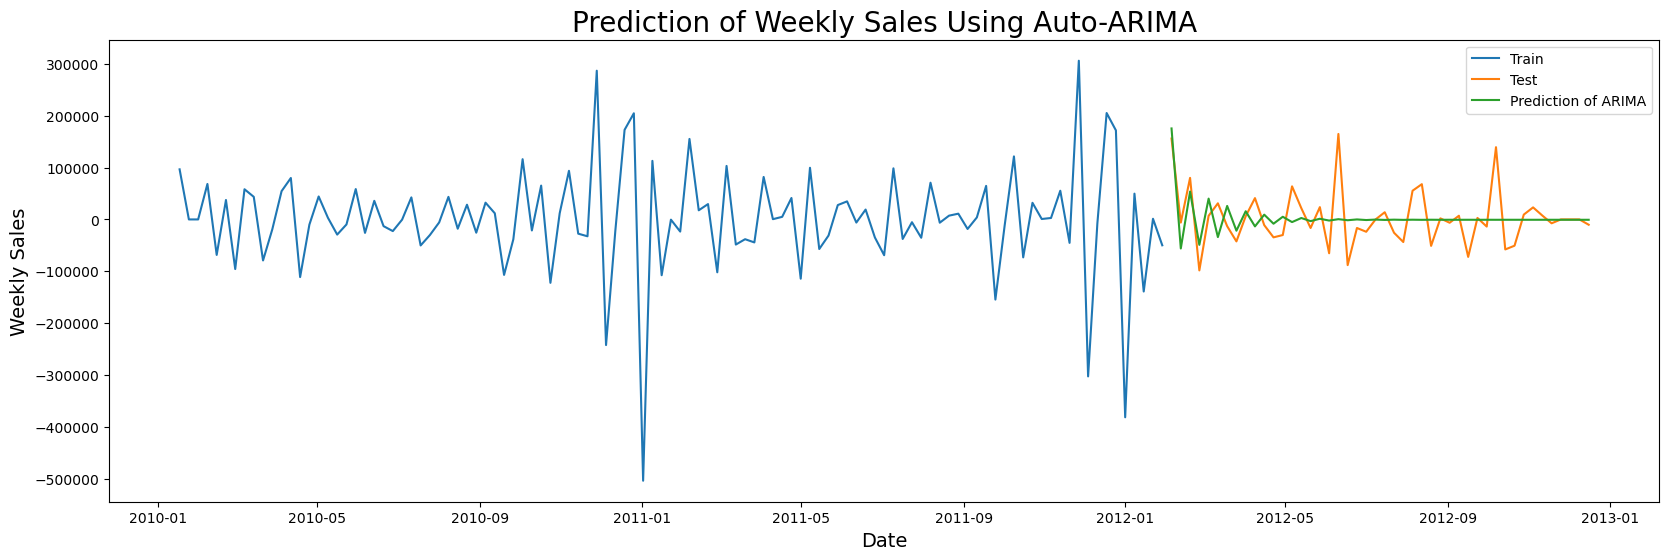

In [89]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

The prediction does not seem to be accurate and believable 

I will check with Exponential Smooting which is  used when data has trend, and it flattens the trend. The damped trend method adds a damping parameter so, the trend converges to a constant value in the future.

In [90]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

C:\Users\rashm\AppData\Local\Temp\ipykernel_21344\3637593170.py:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  exp_smoothing = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
C:\Users\rashm\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


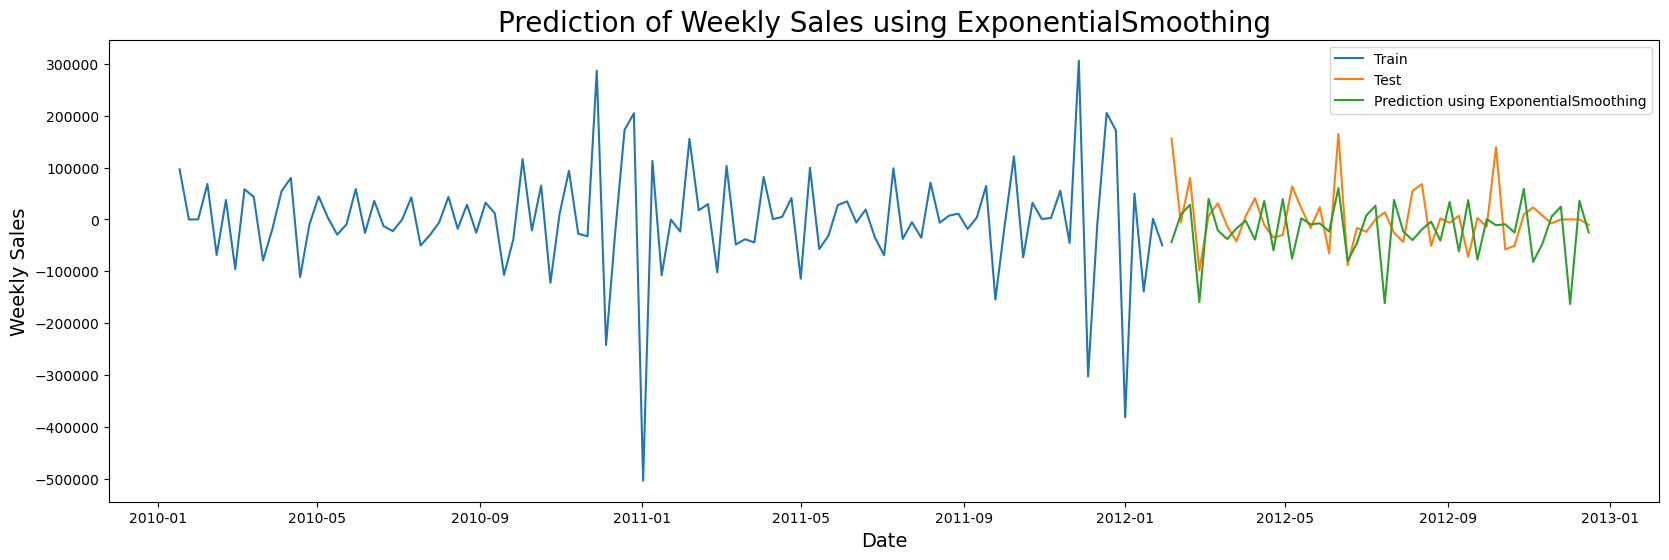

In [98]:
exp_smoothing = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = exp_smoothing.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()